<a href="https://colab.research.google.com/github/PadalaKavya/MajorProject/blob/base/Dataturks_tweets_MajorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing relevant packages

In [ ]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=c0c29acb189d41e2d72e611285e56b2fe437a40f20e48ed29a2a3793f326a6b2
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [ ]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from nltk.stem.porter import PorterStemmer
import nltk
import re, string
from nltk.corpus import stopwords

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn import metrics


In [ ]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Loading Data

In [ ]:
url = 'https://drive.google.com/uc?export=download&id=12fBlhsa5GIdtme1jT3KlPPIgIdjzqhv1'
df = pd.read_json(url, lines= True,orient='columns')
df.head

<bound method NDFrame.head of                                                  content  \
0                                 Get fucking real dude.   
1       She is as dirty as they come  and that crook ...   
2       why did you fuck it up. I could do it all day...   
3       Dude they dont finish enclosing the fucking s...   
4       WTF are you talking about Men? No men thats n...   
...                                                  ...   
19996    I dont. But what is complaining about it goi...   
19997   Bahah  yeah i&;m totally just gonna&; get pis...   
19998       hahahahaha >:) im evil mwahahahahahahahahaha   
19999            What&;s something unique about Ohio? :)   
20000              Who is the biggest gossiper you know?   

                          annotation  extras  
0      {'notes': '', 'label': ['1']}     NaN  
1      {'notes': '', 'label': ['1']}     NaN  
2      {'notes': '', 'label': ['1']}     NaN  
3      {'notes': '', 'label': ['1']}     NaN  
4      {'notes

In [ ]:
for i in range(0,len(df)):
    if df.annotation[i]['label'][0] == '1':
        df.annotation[i] = 1
    else:
        df.annotation[i] = 0

<ipython-input-10-63a5844c426a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.annotation[i] = 1
<ipython-input-10-63a5844c426a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.annotation[i] = 0


In [ ]:
df.drop(['extras'],axis = 1,inplace = True)
df

,content,annotation
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1
...,...,...
19996,I dont. But what is complaining about it goi...,0
19997,Bahah yeah i&;m totally just gonna&; get pis...,0
19998,hahahahaha >:) im evil mwahahahahahahahahaha,0
19999,What&;s something unique about Ohio? :),0


In [ ]:
df.shape 

(20001, 2)

# Visualization

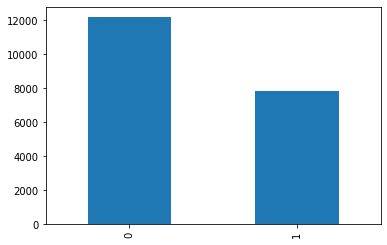

In [ ]:
df['annotation'].value_counts().sort_index().plot.bar()

In [ ]:
#Biasness
print("Positive Non cyberbullying: ", df.annotation.value_counts()[0]/len(df.annotation)*100,"%")
print("Cyberbulling: ", df.annotation.value_counts()[1]/len(df.annotation)*100,"%")

Positive Non cyberbullying:  60.89195540222989 %
Cyberbulling:  39.10804459777012 %


# Preprocessing

In [ ]:
nltk.download('stopwords')
stop = stopwords.words('english')

regex = re.compile('[%s]' % re.escape(string.punctuation))

def test_re(s):
    return regex.sub('', s)

df ['content_without_stopwords'] = df['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df ['content_without_puncs'] = df['content_without_stopwords'].apply(lambda x: regex.sub('',x))
del df['content_without_stopwords']
del df['content']
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,annotation,content_without_puncs
0,1,Get fucking real dude
1,1,She dirty come crook Rengel Dems fucking corru...
2,1,fuck up I could day too Lets hour Ping later s...
3,1,Dude dont finish enclosing fucking showers I h...
4,1,WTF talking Men No men thats menage thats gay
...,...,...
19996,0,I dont But complaining going do
19997,0,Bahah yeah im totally gonna get pissed talking...
19998,0,hahahahaha im evil mwahahahahahahahahaha
19999,0,Whats something unique Ohio


In [ ]:
#Stemming
porter_stemmer = PorterStemmer()
#punctuations
nltk.download('punkt')
tok_list = []
size = df.shape[0]

for i in range(size):
  word_data = df['content_without_puncs'][i]
  nltk_tokens = nltk.word_tokenize(word_data)
  final = ''
  for w in nltk_tokens:
    final = final + ' ' + porter_stemmer.stem(w)
  tok_list.append(final)

df['content_tokenize'] = tok_list
del df['content_without_puncs']
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,annotation,content_tokenize
0,1,get fuck real dude
1,1,she dirti come crook rengel dem fuck corrupt ...
2,1,fuck up i could day too let hour ping later s...
3,1,dude dont finish enclos fuck shower i hate ha...
4,1,wtf talk men no men that menag that gay
...,...,...
19996,0,i dont but complain go do
19997,0,bahah yeah im total gon na get piss talk you ...
19998,0,hahahahaha im evil mwahahahahahahahahaha
19999,0,what someth uniqu ohio


In [ ]:
noNums = []
for i in range(len(df)):
  noNums.append(''.join([i for i in df['content_tokenize'][i] if not i.isdigit()]))

df['content'] = noNums
df

,annotation,content_tokenize,content
0,1,get fuck real dude,get fuck real dude
1,1,she dirti come crook rengel dem fuck corrupt ...,she dirti come crook rengel dem fuck corrupt ...
2,1,fuck up i could day too let hour ping later s...,fuck up i could day too let hour ping later s...
3,1,dude dont finish enclos fuck shower i hate ha...,dude dont finish enclos fuck shower i hate ha...
4,1,wtf talk men no men that menag that gay,wtf talk men no men that menag that gay
...,...,...,...
19996,0,i dont but complain go do,i dont but complain go do
19997,0,bahah yeah im total gon na get piss talk you ...,bahah yeah im total gon na get piss talk you ...
19998,0,hahahahaha im evil mwahahahahahahahahaha,hahahahaha im evil mwahahahahahahahahaha
19999,0,what someth uniqu ohio,what someth uniqu ohio


In [ ]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True, sublinear_tf=True)
tfIdf = tfIdfVectorizer.fit_transform(df.content.tolist())

In [ ]:
print(tfIdf.shape) # means total rows  20001 with 14783 features

(20001, 14783)


In [ ]:
dfx = pd.DataFrame(tfIdf.toarray(), columns = tfIdfVectorizer.get_feature_names())
print(dfx)

        aa  aaaaaaaaaa  aaaaaanndgummi  aaaagh  aaaawwwww  aaand  \
0      0.0         0.0             0.0     0.0        0.0    0.0   
1      0.0         0.0             0.0     0.0        0.0    0.0   
2      0.0         0.0             0.0     0.0        0.0    0.0   
3      0.0         0.0             0.0     0.0        0.0    0.0   
4      0.0         0.0             0.0     0.0        0.0    0.0   
...    ...         ...             ...     ...        ...    ...   
19996  0.0         0.0             0.0     0.0        0.0    0.0   
19997  0.0         0.0             0.0     0.0        0.0    0.0   
19998  0.0         0.0             0.0     0.0        0.0    0.0   
19999  0.0         0.0             0.0     0.0        0.0    0.0   
20000  0.0         0.0             0.0     0.0        0.0    0.0   

       aaanyyywhoooooooo  aaargh  aaarrrg  aah  ...  zon  zone  zoo  zoom  \
0                    0.0     0.0      0.0  0.0  ...  0.0   0.0  0.0   0.0   
1                    0.0     

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
def display_scores(vectorizer, tfidf_result):
    scores = zip(vectorizer.get_feature_names(),
                 np.asarray(tfidf_result.sum(axis=0)).ravel())
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    i=0
    for item in sorted_scores:
        print ("{0:50} Score: {1}".format(item[0], item[1]))
        i = i+1
        if (i > 25):
          break

In [ ]:
#top 25 words
display_scores(tfIdfVectorizer, tfIdf)

hate                                               Score: 533.8157298036014
fuck                                               Score: 503.76150769255435
damn                                               Score: 482.3875012051478
suck                                               Score: 407.3779087712718
ass                                                Score: 337.54089621427744
that                                               Score: 311.6250930420745
lol                                                Score: 298.0085779872157
im                                                 Score: 296.0216055277791
like                                               Score: 287.8183474868775
you                                                Score: 284.7850587424088
it                                                 Score: 254.75722294501585
get                                                Score: 253.1974790260799
what                                               Score: 221.43673623523864
know    

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X=tfIdf.toarray()
y = np.array(df.annotation.tolist())
#Spltting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16000, 14783)
(16000,)
(4001, 14783)
(4001,)


In [ ]:
#Training data biasness
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[   0    1]
 [9750 6250]]


In [ ]:
#Test Data
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[   0    1]
 [2429 1572]]


In [ ]:
#Random oversampling on training data
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='not majority')
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [ ]:
print(X_over.shape)
print(y_over.shape)

(19500, 14783)
(19500,)


In [ ]:
unique_elements, counts_elements = np.unique(y_over, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[   0    1]
 [9750 9750]]


# Training and Calculating Scores

In [ ]:
def getStatsFromModel(model):
  print(classification_report(y_test, y_pred))
  disp = plot_precision_recall_curve(model, X_test, y_test)
  disp.ax_.set_title('Precision-Recall curve: ')
  
  logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
  fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
  plt.figure()
  plt.plot(fpr, tpr, label='(area = %0.2f)' % logit_roc_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic(ROC)')
  plt.legend(loc="lower right")
  plt.savefig('Log_ROC')
  plt.show()

## Normal Methods

In [ ]:
from sklearn.svm import LinearSVC
sv = LinearSVC()
svmodel = sv.fit(X_over, y_over)
y_pred = svmodel.predict(X_test)
print ("Train Score:", svmodel.score(X_train, y_train))
print ("Score:", svmodel.score(X_test, y_test))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
#getStatsFromModel(sv)

Train Score: 0.9520625
Score: 0.8657835541114721
Confusion Matrix: 
 [[2011  418]
 [ 119 1453]]


Train Score: 0.758375
Score: 0.6160959760059985
Confusion Matrix: 
 [[ 924 1505]
 [  31 1541]]
              precision    recall  f1-score   support

           0       0.97      0.38      0.55      2429
           1       0.51      0.98      0.67      1572

    accuracy                           0.62      4001
   macro avg       0.74      0.68      0.61      4001
weighted avg       0.79      0.62      0.59      4001



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


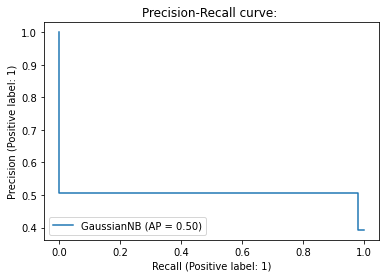

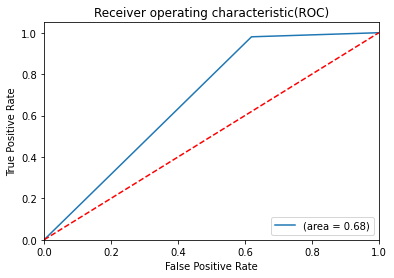

In [ ]:
#Supervised Methods
# 3 normal methods
# 2 ensemble methods
gnb = GaussianNB()
gnbmodel = gnb.fit(X_over, y_over)
y_pred = gnbmodel.predict(X_test)
print ("Train Score:", gnbmodel.score(X_train, y_train))
print ("Score:", gnbmodel.score(X_test, y_test))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(gnb)

Train Score: 0.87325
Accuracy:  0.8015496125968508
Confusion Matrix: 
 [[1902  527]
 [ 267 1305]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      2429
           1       0.71      0.83      0.77      1572

    accuracy                           0.80      4001
   macro avg       0.79      0.81      0.80      4001
weighted avg       0.81      0.80      0.80      4001



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


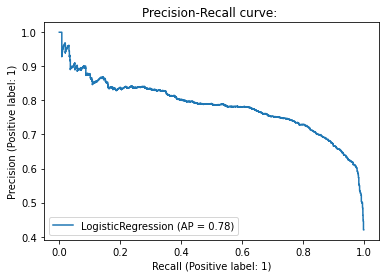

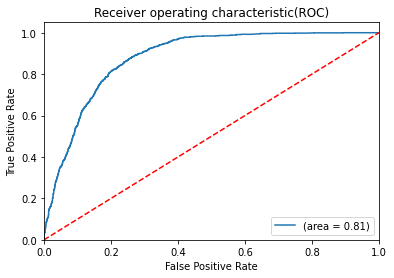

In [ ]:
lgr = LogisticRegression()
lgr.fit(X_over, y_over)
y_pred = lgr.predict(X_test)
print ("Train Score:", lgr.score(X_train, y_train))
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(lgr)

In [ ]:
xg = XGBoostClassifier()
xg.fit(X_over, y_over)
y_pred = .predict(X_test)
print ("Train Score:", metrics.accuracy_score(X_train, y_train))
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(lgr)

Train Score: 0.9943125
Accuracy:  0.849787553111722
Confusion Matrix: 
 [[1888  541]
 [  60 1512]]
              precision    recall  f1-score   support

           0       0.97      0.78      0.86      2429
           1       0.74      0.96      0.83      1572

    accuracy                           0.85      4001
   macro avg       0.85      0.87      0.85      4001
weighted avg       0.88      0.85      0.85      4001



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


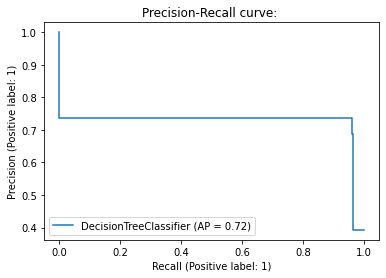

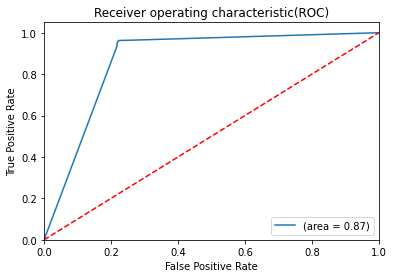

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_over, y_over)
y_pred = dtc.predict(X_test)
print ("Train Score:", dtc.score(X_train, y_train))
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(dtc)

## Ensemble Methods

In [ ]:
#Ensemble methods from here 
'''
abc = AdaBoostClassifier() 
abc.fit(X_over, y_over)
y_pred = abc.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(abc)
'''

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train Score: 0.9943125


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Score: 0.9192701824543864
Confusion Matrix: 
 [[2180  249]
 [  74 1498]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      2429
           1       0.86      0.95      0.90      1572

    accuracy                           0.92      4001
   macro avg       0.91      0.93      0.92      4001
weighted avg       0.92      0.92      0.92      4001



[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished


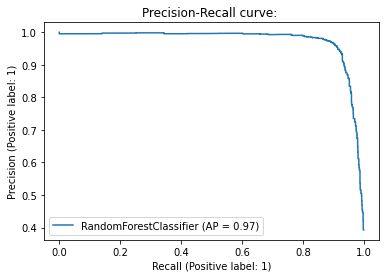

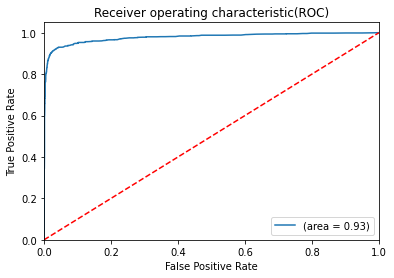

In [ ]:
rfc = RandomForestClassifier(verbose=True) #uses randomized decision trees
rfcmodel = rfc.fit(X_over, y_over)
y_pred = rfc.predict(X_test)
print("Train Score:", rfcmodel.score(X_train, y_train))
print("Score:", rfcmodel.score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(rfc)